<h1 align="center"> Análsis Exploratorio de Datos (EDA) </h1>
<hr>

<h2 align="center">Proyecto Individual N°2 - Data Analyst</h2>
<hr>

<h3 align="center"> Informe de victimas fatales por accidentes viales en CABA </h3>

En este estudio se trabaja con información proporcionada por el Observatorio de Movilidad y Seguridad Vial (OMSV), un centro de estudios que se encuentra bajo la órbita de la Secretaría de Transporte del Gobierno de la Ciudad Autónoma de Buenos Aires. Se utiliza un conjunto de datos sobre homicidios en siniestros viales que contiene dos hojas llamadas: "hechos" y "víctimas". Estos accidentes ocurrieron en la Ciudad de Buenos Aires durante el periodo 2016-2021.
  
Según la información obtenida de Buenos Aires Data, un hecho o siniestro vial es cualquier accidente de tránsito que involucre al menos un vehículo en movimiento, que ocurra en una vía pública o en una vía privada a la que la población tenga derecho de acceso, y que tenga como resultado al menos una persona herida o muerta. En este caso, solo se trabajará con accidentes fatales.

Importacion de librerias:

In [106]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

**Data Frame VICTIMAS**

Primero se decide trabajar con el DataFrame (DF) de víctimas, es decir, personas fallecidas como consecuencia de un siniestro vial. Se lee la pestaña "VICTIMAS" del archivo de homicidios y se convierte en un DataFrame. Se utiliza .head() para visualizar la estructura general de los datos y .shape para conocer el tamaño del DataFrame. Luego, se aplica .info() y .duplicated() donde podemos observar cada columna con su cantidad de datos no nulos, el tipo de dato y la presencia de duplicados.

In [3]:
df_victimas = pd.read_excel("homicidios.xlsx",sheet_name='VICTIMAS')

In [4]:
df_victimas.head(3)

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00


In [5]:
df_victimas.shape

(717, 10)

In [6]:
df_victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             717 non-null    object        
 1   FECHA                717 non-null    datetime64[ns]
 2   AAAA                 717 non-null    int64         
 3   MM                   717 non-null    int64         
 4   DD                   717 non-null    int64         
 5   ROL                  717 non-null    object        
 6   VICTIMA              717 non-null    object        
 7   SEXO                 717 non-null    object        
 8   EDAD                 717 non-null    object        
 9   FECHA_FALLECIMIENTO  717 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 56.1+ KB


In [7]:
df_victimas.duplicated().sum()

0

De manera general, lo primero que hacemos es verificar el tipo de dato presente en cada columna y la cantidad de cada uno de ellos utilizando .apply(type) y .value_counts(). Dependiendo del caso, exploramos la cantidad de nulos con .isna(), qué valores únicos se encuentran y en qué cantidad con .value_counts(). En el caso de que sea necesario, se convierte toda la columna a un solo tipo de dato específico con .astype() para facilitar el trabajo con los registros. 
Luego, procedemos al análisis de cada columna de manera particular.

**Columna ID_hecho**
<p>
Vemos que hay 21 'ID_hecho' duplicados, esto se debe a que en un mismo hecho o siniestros puede haber mas de una victima.
</p>

In [8]:
df_victimas["ID_hecho"].apply(type).value_counts()

<class 'str'>    717
Name: ID_hecho, dtype: int64

In [9]:
# duplicados
df_victimas["ID_hecho"].duplicated().sum()

21

**Columna FECHA, AAAA, MM, DD**

- En el gráfico de 'cantidad de víctimas por año', podemos observar que a partir del 2019 la cantidad de víctimas viales disminuyó notablemente en relación a los años anteriores; además, se aprecia que particularmente en el 2020 la cantidad es aún menor. (Esto puede estar relacionado con la implementación de políticas públicas para la reducción de accidentes viales y en 2020, particularmente, se redujo la circulación de personas debido a la pandemia).
- En el gráfico de 'cantidad de víctimas por mes', vemos que el mes con mayor cantidad de víctimas es diciembre. (Esto puede estar relacionado con el aumento de movimiento y actividad de las personas en este mes, debido a la finalización de actividades y eventos festivos, entre otras).

In [10]:
print("FECHA", df_victimas["FECHA"].apply(type).value_counts())
print("AAAA", df_victimas["AAAA"].apply(type).value_counts())
print("MM", df_victimas["MM"].apply(type).value_counts())
print("DD", df_victimas["DD"].apply(type).value_counts())

FECHA <class 'pandas._libs.tslibs.timestamps.Timestamp'>    717
Name: FECHA, dtype: int64
AAAA <class 'int'>    717
Name: AAAA, dtype: int64
MM <class 'int'>    717
Name: MM, dtype: int64
DD <class 'int'>    717
Name: DD, dtype: int64


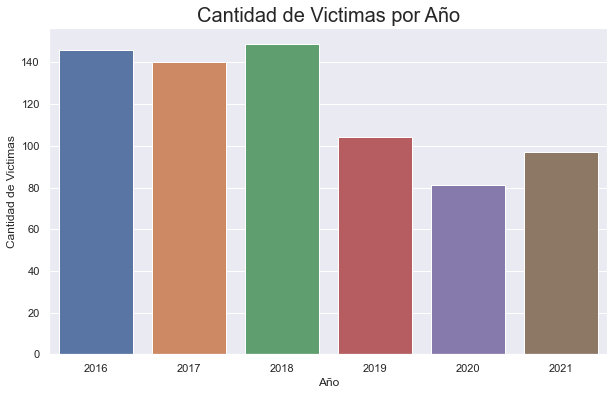

In [105]:
# Hacemos un grafico para ver la distribucion de las victimas en los años
plt.figure(figsize=(10, 6))
sns.countplot(x=df_victimas['AAAA'])

plt.xlabel('Año')
plt.ylabel('Cantidad de Victimas')
plt.title('Cantidad de Victimas por Año', fontsize=20)
plt.show()

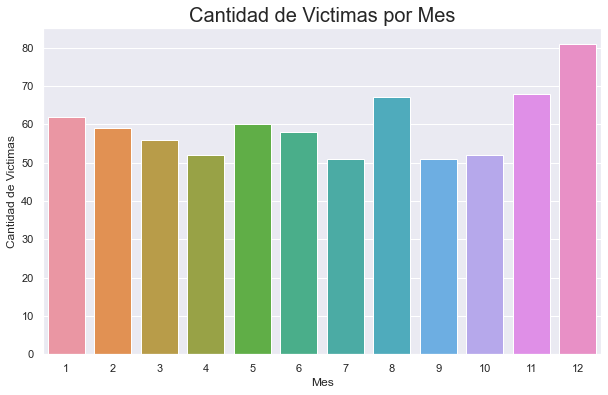

In [12]:
# Hacemos un grafico para ver la distribucion de las victimas en los meses
plt.figure(figsize=(10, 6))
sns.countplot(x=df_victimas['MM'])

plt.xlabel('Mes')
plt.ylabel('Cantidad de Victimas')
plt.title('Cantidad de Victimas por Mes', fontsize=20)
plt.show()

**Columna FECHA_FALLECIMIENTO**

- Las víctimas presentes en este DF son víctimas fatales, es decir, cualquier persona fallecida luego de un hecho de tránsito con víctimas, excluidos los suicidios. Esta columna posee 69 datos en formato string, de los cuales, 68 datos corresponden a valores iguales a 'SD'.
- En el gráfico de torta podemos ver que la porción de datos en formato str es menos del 10% del total de datos, es decir, que son una porción pequeña de los mismos.
Considerando que las fechas en las que ocurrieron los fallecimientos son de vital importancia para el análisis posterior, se decide imputar los valores sin fecha con las fechas en las que ocurrieron estos siniestros; columna 'FECHA'.
Además, se identifica el dato que tiene formato string pero que no es 'SD' y se convierte al formato correcto con datetime.strptime().

In [13]:
df_victimas["FECHA_FALLECIMIENTO"].apply(type).value_counts()

<class 'datetime.datetime'>    648
<class 'str'>                   69
Name: FECHA_FALLECIMIENTO, dtype: int64

In [14]:
df_victimas["FECHA_FALLECIMIENTO"].value_counts().head(2)

SD                     68
2017-02-26 00:00:00     3
Name: FECHA_FALLECIMIENTO, dtype: int64

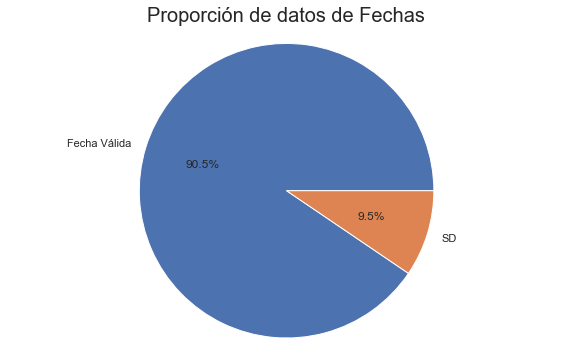

In [15]:
# Hacemos un grafico para ver la proporcion de datos sin fecha = 'SD'

# Hacemos una funcion que diferencie los datos en formato fecha de los otros
def formato_fecha(text):
    try:
        pd.to_datetime(text, format='%d/%m/%Y')
        return True
    except ValueError:
        return False

# Aplico la función a la columna "FECHA_FALLECIMIENTO" y 
# cuento la cantidad de valores con formato fecha y con otro formato
formato = df_victimas["FECHA_FALLECIMIENTO"].apply(formato_fecha)
cantidad_formato = formato.value_counts()
cantidad = cantidad_formato.values
etiquetas = ['Fecha Válida', 'SD']

plt.figure(figsize=(10, 6))
plt.pie(cantidad, labels=etiquetas, autopct='%1.1f%%')
plt.axis('equal') 
plt.title("Proporción de datos de Fechas", fontsize=20)

plt.show()

In [16]:
# identifico el registro str que no es 'SD'
df_victimas[(df_victimas["FECHA_FALLECIMIENTO"] != 'SD') & (df_victimas["FECHA_FALLECIMIENTO"].apply(lambda x: isinstance(x, str)))]

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
454,2019-0019,2019-03-06,2019,3,6,CONDUCTOR,MOTO,MASCULINO,SD,26/03/2019


In [17]:
# cambio el formato de ese registro
datetime.strptime(df_victimas["FECHA_FALLECIMIENTO"].iloc[454], "%d/%m/%Y")

datetime.datetime(2019, 3, 26, 0, 0)

In [18]:
# remplazo los registros igual 'SD' por los valores de la columna 'FECHA'
df_victimas.loc[df_victimas['FECHA_FALLECIMIENTO'] == 'SD', 'FECHA_FALLECIMIENTO'] = df_victimas['FECHA']

**Columnas con datos categóricos: 'ROL', 'VICTIMA', 'SEXO'**

- En el gráfico de torta de la variable 'SEXO', podemos ver que la mayoría de las personas involucradas son hombres, representando el 76% del total. Además, existe una porción muy pequeña (0.8%) de registros 'SD', los cuales se decide imputar con el valor de la moda (MASCULINO) para facilitar el EDA.
- En el gráfico de 'Roles en siniestros viales' podemos ver la mayor cantidad de roles participantes en siniestros está dada por Conductores y peatones, los cuales representan más del 83% del total de roles involucrados.
- En el gráfico de 'Víctimas en siniestros viales' podemos ver que la mayor cantidad de víctimas fatales, al momento del siniestro, estaban en una moto o como peatón; sumando estos dos casos casi el 80% del total de las víctimas fatales.

In [19]:
df_victimas["SEXO"].apply(type).value_counts()

<class 'str'>    717
Name: SEXO, dtype: int64

In [20]:
df_victimas["SEXO"].value_counts()

MASCULINO    545
FEMENINO     166
SD             6
Name: SEXO, dtype: int64

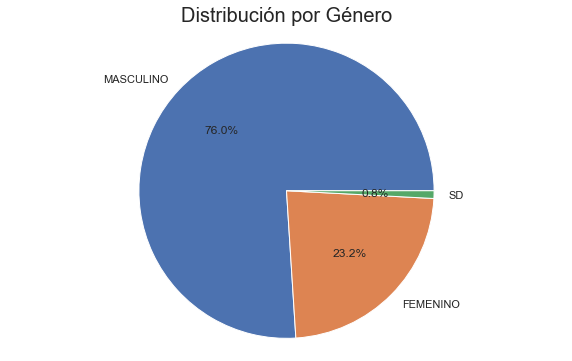

In [22]:
# grafico para visualizar la porcion de cada genero
frecuencias = df_victimas["SEXO"].value_counts()

plt.figure(figsize=(10, 6))
plt.title('Distribución por Género', fontsize=20)
plt.pie(frecuencias, labels=frecuencias.index, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

In [23]:
# los valores 'SD' que reprentan solo el 0.8% del total, se imputan por el valor moda 
df_victimas['SEXO'] = df_victimas['SEXO'].replace('SD', 'MASCULINO')

# Cambio de tipo de dato categorico
df_victimas["SEXO"]=df_victimas["SEXO"].astype("category")

**Columna ROL**

In [24]:
df_victimas["ROL"].apply(type).value_counts()

<class 'str'>    717
Name: ROL, dtype: int64

In [25]:
# Cambio de tipo de dato categorico
df_victimas["ROL"]=df_victimas["ROL"].astype("category")

In [26]:
df_victimas["ROL"].value_counts()

CONDUCTOR               330
PEATON                  267
PASAJERO_ACOMPAÑANTE     80
CICLISTA                 29
SD                       11
Name: ROL, dtype: int64

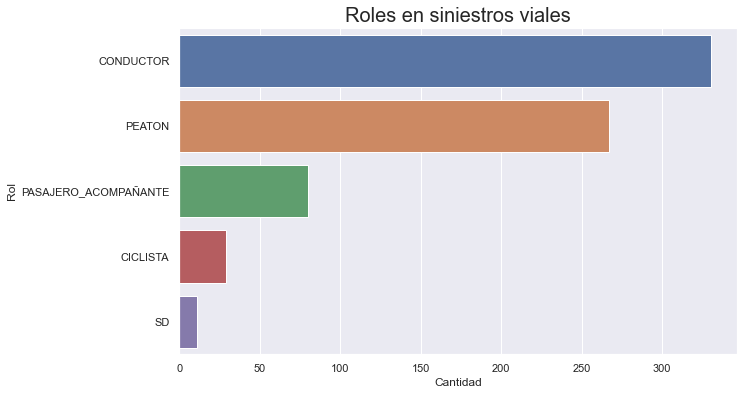

In [27]:
# Grafico para ver la frecuencia o cantidad de cada unos de los posibles roles 

plt.figure(figsize=(10, 6))
sns.countplot(y=df_victimas['ROL'], order=df_victimas['ROL'].value_counts().index)
plt.xlabel('Cantidad')
plt.ylabel('Rol')
plt.title('Roles en siniestros viales', fontsize=20)
plt.show()

**Columna VICTIMA**

In [28]:
df_victimas["VICTIMA"].apply(type).value_counts()

<class 'str'>    717
Name: VICTIMA, dtype: int64

In [29]:
# Cambio de tipo de dato categorico
df_victimas["VICTIMA"]=df_victimas["VICTIMA"].astype("category")

In [30]:
df_victimas["VICTIMA"].value_counts()

MOTO         303
PEATON       267
AUTO          94
BICICLETA     29
SD             9
CARGAS         7
PASAJEROS      5
MOVIL          3
Name: VICTIMA, dtype: int64

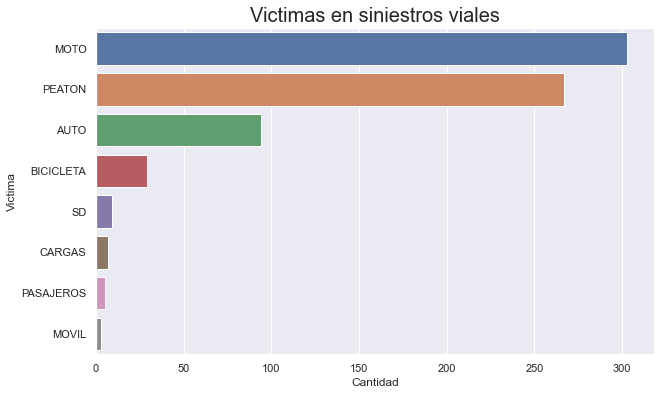

In [31]:
# Grafico para ver la cantidad de cada unos de los tipos de victimas

plt.figure(figsize=(10, 6))
sns.countplot(y=df_victimas['VICTIMA'], order=df_victimas['VICTIMA'].value_counts().index)
plt.xlabel('Cantidad')
plt.ylabel('Victima')
plt.title('Victimas en siniestros viales', fontsize=20)
plt.show()

**Columna EDAD**

- En el gráfico 'Tipos de datos en columna Edad' podemos ver que el 7,4% de los registros son 'SD'.
Para facilitar el tratamiento de la variable edad y debido a que la edad de las víctimas también es un dato relevante al momento del análisis; se decide imputar los registros 'SD'. Para ello se crearon nuevas columnas donde se imputan los datos de diferentes criterios: promedio, mediana, moda y vecino más cercano (knn).
Podemos ver la comparación de los datos resultantes de estas imputaciones con .describe() y en el gráfico de densidades.
- Se decide utilizar la imputación por knn, ya que es la que menos modifica el comportamiento original de los datos.
Y por último, se visualiza un gráfico de caja de la variable 'EDAD', donde se puede ver con claridad que no hay outliers, que tenemos edades desde un año hasta 95, con una mayor proporción desde los 39 a los 55 años. 
- También se presenta el gráfico 'Distribución de la Edad de las víctimas', donde se ve que la mayor cantidad de víctimas están entre los 20 y 30 años.

In [32]:
df_victimas["EDAD"].apply(type).value_counts()

<class 'int'>    664
<class 'str'>     53
Name: EDAD, dtype: int64

In [33]:
# corroboro que todos los str sean SD
df_victimas["EDAD"][df_victimas['EDAD'].apply(lambda x: isinstance(x, str))].unique()

array(['SD'], dtype=object)

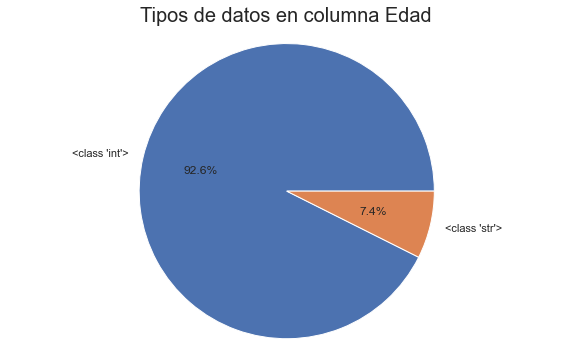

In [35]:
# grafico para visualizar el tipo de dato de la columna Edad
frecuencias = df_victimas["EDAD"].apply(type).value_counts()

plt.figure(figsize=(10, 6))
plt.title('Tipos de datos en columna Edad', fontsize=20)
plt.pie(frecuencias, labels=frecuencias.index, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

In [36]:
# Para la imputacion de datos:

# creo una columna con None en vez de SD y la convierto a float
df_victimas['EDAD_INT'] = df_victimas['EDAD'].replace('SD', None)
df_victimas['EDAD_INT']= df_victimas['EDAD_INT'].astype("float")

# hago una nueva columna para cada metodo de imputacion y remplazo los faltantes
df_victimas['EDAD_MEAN'] = df_victimas['EDAD'].replace('SD', df_victimas['EDAD_INT'].mean())
df_victimas['EDAD_MEDIAN'] = df_victimas['EDAD'].replace('SD', df_victimas['EDAD_INT'].median())
df_victimas['EDAD_MODA'] = df_victimas['EDAD'].replace('SD', df_victimas['EDAD_INT'].mode()[0])

imputer = KNNImputer(n_neighbors=5)
df_victimas['EDAD_KNN']= imputer.fit_transform(df_victimas[['EDAD_INT']])[:,0]

In [37]:
# Analizo los datos numericos de las opciones
df_victimas[['EDAD_MEAN', 'EDAD_MEDIAN', 'EDAD_MODA','EDAD_KNN','EDAD_INT']].describe()

,EDAD_MEAN,EDAD_MEDIAN,EDAD_MODA,EDAD_KNN,EDAD_INT
count,717.000000,717.000000,717.000000,717.000000,664.000000
mean,42.167169,41.785216,41.267782,42.167169,42.167169
std,19.041576,19.089576,19.306213,19.041576,19.788034
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,28.000000,28.000000,28.000000,28.000000,27.000000
50%,39.000000,37.000000,35.000000,39.000000,37.000000
75%,55.000000,55.000000,55.000000,55.000000,56.250000
max,95.000000,95.000000,95.000000,95.000000,95.000000


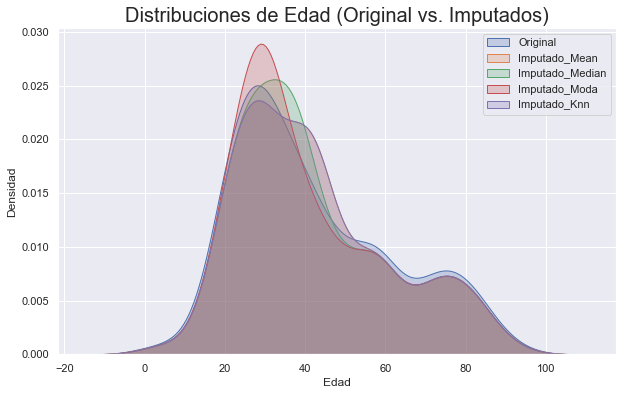

In [38]:
# analizo el grafico de densidad de las opciones
plt.figure(figsize=(10, 6))

sns.kdeplot(df_victimas['EDAD_INT'], label='Original', shade=True)
sns.kdeplot(df_victimas['EDAD_MEAN'], label='Imputado_Mean',  shade=True)
sns.kdeplot(df_victimas['EDAD_MEDIAN'], label='Imputado_Median', shade=True)
sns.kdeplot(df_victimas['EDAD_MODA'], label='Imputado_Moda', shade=True)
sns.kdeplot(df_victimas['EDAD_KNN'], label='Imputado_Knn', shade=True)

plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.title('Distribuciones de Edad (Original vs. Imputados)', fontsize=20)
plt.legend()

plt.show()

In [39]:
# me quedo con los datos imputados con KNN
df_victimas = df_victimas.drop(columns=['EDAD', 'EDAD_INT', 'EDAD_MEAN', 'EDAD_MEDIAN','EDAD_MODA'])

# renombro y convierto a entero
df_victimas = df_victimas.rename(columns={'EDAD_KNN':'EDAD'})
df_victimas["EDAD"]=df_victimas["EDAD"].astype("int64")

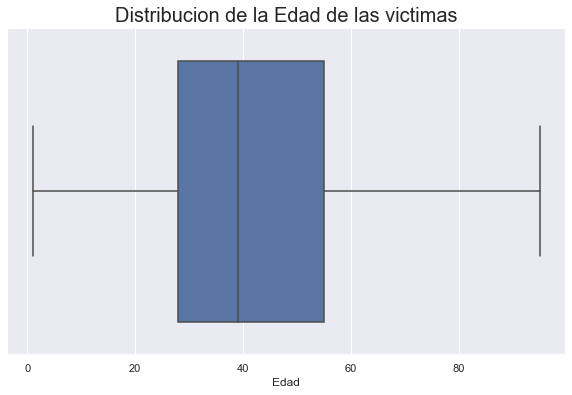

In [40]:
# grafico de caja para ver la distribucion de los datos de edad y la presencia de outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_victimas["EDAD"])
plt.xlabel('Edad')
plt.title('Distribucion de la Edad de las victimas', fontsize=20)

plt.show()

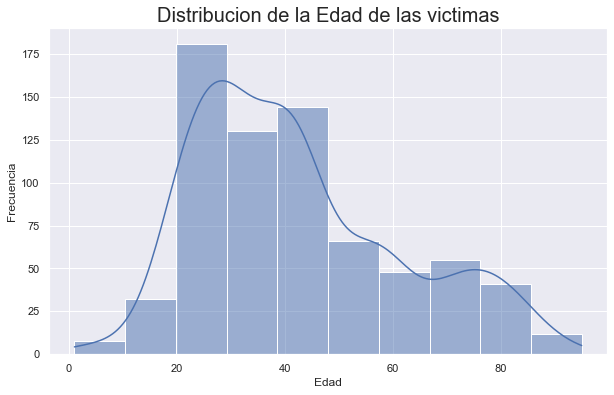

In [41]:
# histograma de la edad
plt.figure(figsize=(10, 6))
sns.histplot(data=df_victimas, x='EDAD', kde=True, bins=10) 
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribucion de la Edad de las victimas', fontsize=20)
plt.show()

In [42]:
#df_victimas[['ID_hecho', 'FECHA', 'ROL', 'VICTIMA', 'SEXO', 'EDAD']].to_csv('Power_BI\df_victimas.csv', index=False)

**Data Frame HECHOS**

Luego se trabaja con el DF de hechos, es decir:
- Cualquier hecho de tránsito con implicación de al menos un vehículo en movimiento, que tenga lugar en una vía pública o en una vía privada a la que la población tenga derecho de acceso, y que tenga como consecuencia al menos una persona muerta. Un suicidio o intento de suicidio no se considera un siniestro, sino un incidente causado por un acto deliberado de infligirse lesiones mortales. Sin embargo, si un suicidio o un intento de suicidio causan heridas a otro usuario, entonces el incidente debe ser considerado un siniestro con víctimas.
Se incluyen: las colisiones entre vehículos; entre vehículos y peatones; entre vehículos y animales u obstáculos fijos; los siniestros viales con la intervención de sólo un vehículo; y las colisiones entre vehículos y trenes. Las colisiones múltiples se contabilizan como un solo hecho de tránsito si las colisiones se suceden en un periodo de tiempo muy corto. Se excluyen los hechos de tránsito con sólo daños materiales.
- Se lee la pestaña "HECHOS" del archivo de homicidios y se convierte en un DataFrame. Se utiliza .head() para visualizar la estructura general de los datos y .shape para conocer el tamaño del DataFrame. Luego, se aplica .info() y .duplicated() donde podemos observar cada columna con su cantidad de datos no nulos, el tipo de dato y la presencia de duplicados.

In [43]:
df_hechos = pd.read_excel("homicidios.xlsx",sheet_name='HECHOS')

In [44]:
df_hechos.head(3)

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO


In [45]:
df_hechos.shape

(696, 21)

In [46]:
df_hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Direc

In [47]:
df_hechos.duplicated().sum()

0

**Columna ID**

No hay duplicados

In [48]:
df_hechos["ID"].apply(type).value_counts()

<class 'str'>    696
Name: ID, dtype: int64

In [49]:
df_hechos["ID"].duplicated().sum()

0

In [50]:
# renombro
df_hechos = df_hechos.rename(columns={'ID':'ID_hecho'})

**Columna N_VICTIMAS**

En el gráfico 'Cantidad de víctimas por siniestro' se puede ver que en el 97% de los siniestros, la víctima es una sola persona. El resto de los registros corresponden a siniestros donde hay dos o tres víctimas en un mismo hecho.

In [51]:
df_hechos["N_VICTIMAS"].apply(type).value_counts()

<class 'int'>    696
Name: N_VICTIMAS, dtype: int64

In [52]:
df_hechos["N_VICTIMAS"].value_counts()

1    676
2     19
3      1
Name: N_VICTIMAS, dtype: int64

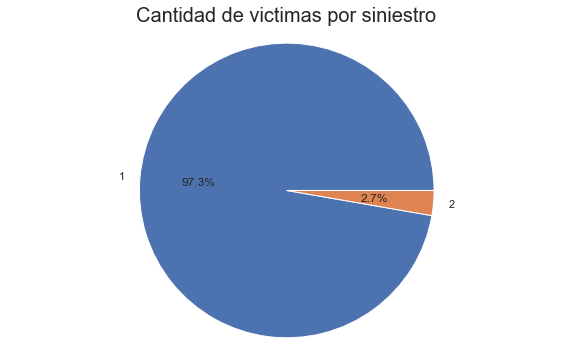

In [53]:
# grafico para visualizar la frecuencia del numero de victimas por siniestro
frecuencias = df_hechos["N_VICTIMAS"].value_counts()[:2]

plt.figure(figsize=(10, 6))
plt.title('Cantidad de victimas por siniestro', fontsize=20)
plt.pie(frecuencias, labels=frecuencias.index, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

**Columnas FECHA, AAAA, MM, DD**

Estan completos y en formato correcto

In [54]:
print("FECHA", df_hechos["FECHA"].apply(type).value_counts())
print("AAAA", df_hechos["AAAA"].apply(type).value_counts())
print("MM", df_hechos["MM"].apply(type).value_counts())
print("DD", df_hechos["DD"].apply(type).value_counts())

FECHA <class 'pandas._libs.tslibs.timestamps.Timestamp'>    696
Name: FECHA, dtype: int64
AAAA <class 'int'>    696
Name: AAAA, dtype: int64
MM <class 'int'>    696
Name: MM, dtype: int64
DD <class 'int'>    696
Name: DD, dtype: int64


**Columna HORA y HH**

- Se decide trabajar con HH y descartar HORA, ya que brindan la misma información pero de manera más resumida, lo cual es suficiente para el alcance de este análisis y proyecto.
- Dentro de la columna 'HH' se identifica el registro en formato str y se lo imputa por la moda.
- En los gráficos podemos ver que no hay presencia de outliers y que los siniestros ocurren a toda hora, con un pequeño aumento entre las 5 y 8 de la mañana.

In [55]:
print("HORA", df_hechos["HORA"].apply(type).value_counts())
print("HH", df_hechos["HH"].apply(type).value_counts())

HORA <class 'datetime.time'>        608
<class 'str'>                   85
<class 'datetime.datetime'>      3
Name: HORA, dtype: int64
HH <class 'int'>    695
<class 'str'>      1
Name: HH, dtype: int64


In [56]:
df_hechos = df_hechos.drop(columns={"HORA"})

In [57]:
# veo el registro str
df_hechos["HH"][df_hechos["HH"].apply(lambda x: isinstance(x, str))]

518    SD
Name: HH, dtype: object

In [58]:
# veo la hora que mas se repite
df_hechos["HH"].value_counts().head(2)

7    41
6    40
Name: HH, dtype: int64

In [59]:
# remplazo el dato 'SD' por el horario moda, es decir, 7
df_hechos["HH"] = df_hechos["HH"].replace('SD', 7)

In [60]:
# cambio el tipo de dato
df_hechos["HH"] = df_hechos["HH"].astype("Int64")

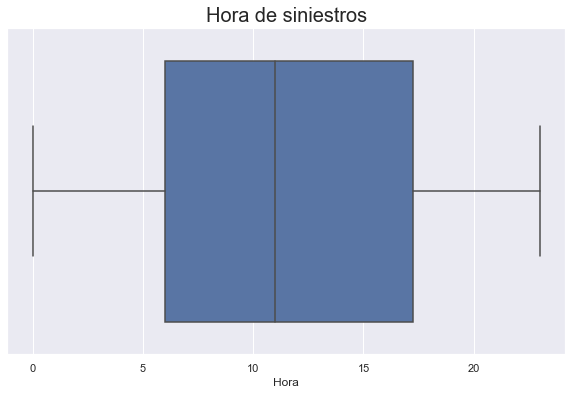

In [61]:
# grafico de caja para ver la distribucion de la hora de los siniestros y la presencia de outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_hechos["HH"])
plt.xlabel('Hora')
plt.title('Hora de siniestros', fontsize=20)

plt.show()

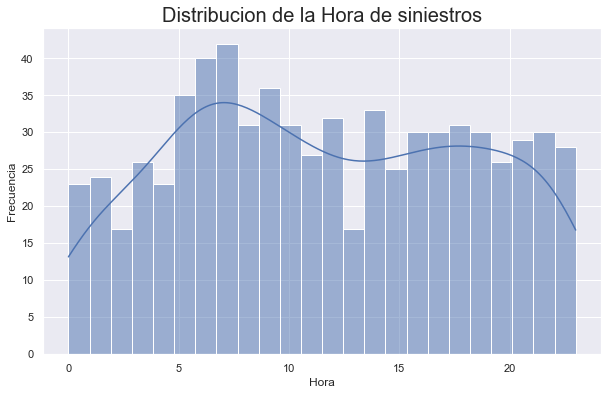

In [62]:
# histograma de la hora de los siniestros
plt.figure(figsize=(10, 6))
sns.histplot(data=df_hechos, x='HH', kde=True, bins=24) 
plt.xlabel('Hora')
plt.ylabel('Frecuencia')
plt.title('Distribucion de la Hora de siniestros', fontsize=20)
plt.show()

**Columnas Categóricas PARTICIPANTES, VICTIMA y ACUSADO**

- Observando el gráfico 'Movilidad de la víctima al momento del hecho', podemos ver que la mayor cantidad de víctimas, al momento del siniestro, se movilizaban en moto o a pie (peatón).
- Y observando el gráfico 'Movilidad del acusado al momento del hecho', podemos ver que la mayor cantidad de personas consideradas responsables del hecho conducían un auto particular o un transporte de carga. La categoría 'pasajeros', si bien tiene una gran representación, está compuesta por personas que ocupaban el lugar de pasajero en el vehículo culpable del siniestro. Entonces, teniendo en cuenta esto y analizando los datos de la columna 'Participantes', podemos decir que la mayor cantidad de siniestros viales está dada por autos y transportes de carga como acusados, con personas a pie o en moto como víctimas.

In [63]:
print("PARTICIPANTES", df_hechos["PARTICIPANTES"].apply(type).value_counts())
print("VICTIMA", df_hechos["VICTIMA"].apply(type).value_counts())
print("ACUSADO", df_hechos["ACUSADO"].apply(type).value_counts())

PARTICIPANTES <class 'str'>    696
Name: PARTICIPANTES, dtype: int64
VICTIMA <class 'str'>    696
Name: VICTIMA, dtype: int64
ACUSADO <class 'str'>    696
Name: ACUSADO, dtype: int64


In [64]:
df_hechos["PARTICIPANTES"] = df_hechos["PARTICIPANTES"].astype('category')
df_hechos["PARTICIPANTES"].value_counts().head()

PEATON-PASAJEROS    105
MOTO-AUTO            83
MOTO-CARGAS          78
PEATON-AUTO          77
MOTO-PASAJEROS       46
Name: PARTICIPANTES, dtype: int64

In [65]:
df_hechos["VICTIMA"] = df_hechos["VICTIMA"].astype('category')
df_hechos["VICTIMA"].value_counts()

MOTO           295
PEATON         264
AUTO            83
BICICLETA       29
SD               9
CARGAS           7
PASAJEROS        5
MOVIL            2
OBJETO FIJO      1
PEATON_MOTO      1
Name: VICTIMA, dtype: int64

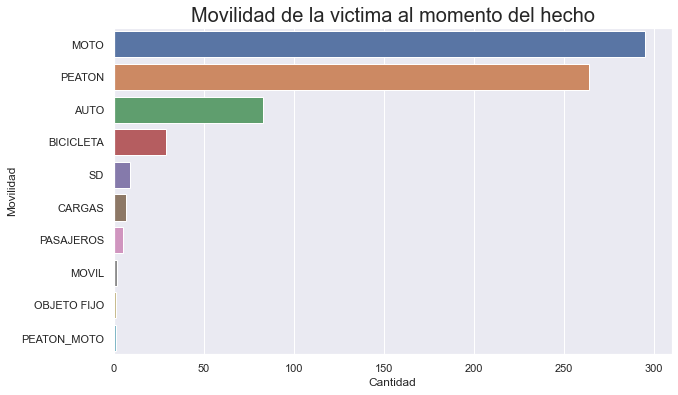

In [66]:
# Grafico para ver en que se movilizaba la victima
plt.figure(figsize=(10, 6))
sns.countplot(y=df_hechos["VICTIMA"], order=df_hechos["VICTIMA"].value_counts().index)
plt.xlabel('Cantidad')
plt.ylabel('Movilidad')
plt.title('Movilidad de la victima al momento del hecho', fontsize=20)

plt.show()

In [67]:
df_hechos["ACUSADO"] = df_hechos["ACUSADO"].astype('category')
df_hechos["ACUSADO"].value_counts()

AUTO           204
PASAJEROS      173
CARGAS         146
OBJETO FIJO     62
MOTO            57
SD              23
MULTIPLE        17
BICICLETA        7
OTRO             6
TREN             1
Name: ACUSADO, dtype: int64

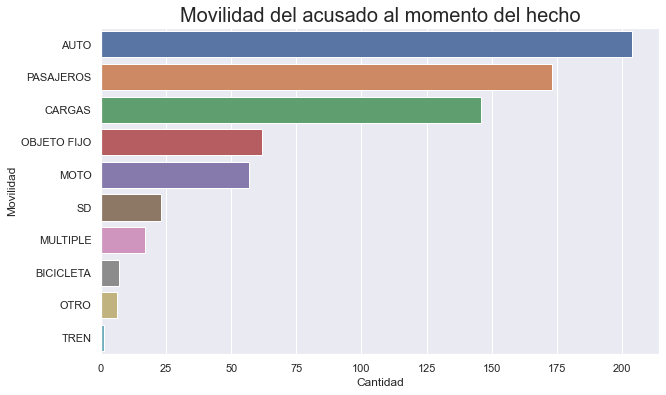

In [68]:
# Grafico para ver en que se mevilizaba el acusado
plt.figure(figsize=(10, 6))
sns.countplot(y=df_hechos["ACUSADO"], order=df_hechos["ACUSADO"].value_counts().index)
plt.xlabel('Cantidad')
plt.ylabel('Movilidad')
plt.title('Movilidad del acusado al momento del hecho', fontsize=20)

plt.show()

**Columnas categoricas 'TIPO_DE_CALLE', 'COMUNA'**

- En el gráfico 'Tipos de calles en siniestros viales' vemos que la mayor cantidad de accidentes se dan en calles tipo 'avenida'.
- En el gráfico 'Cantidad de siniestros por comuna' vemos que la mayor cantidad de accidentes estan dados en la comuna 1, 4 y 9.

In [69]:
print("TIPO_DE_CALLE", df_hechos["TIPO_DE_CALLE"].apply(type).value_counts())
print("COMUNA", df_hechos["COMUNA"].apply(type).value_counts())

TIPO_DE_CALLE <class 'str'>    696
Name: TIPO_DE_CALLE, dtype: int64
COMUNA <class 'int'>    696
Name: COMUNA, dtype: int64


In [70]:
df_hechos["TIPO_DE_CALLE"] = df_hechos["TIPO_DE_CALLE"].astype('category')
df_hechos["TIPO_DE_CALLE"].value_counts()

AVENIDA      429
CALLE        136
AUTOPISTA     66
GRAL PAZ      65
Name: TIPO_DE_CALLE, dtype: int64

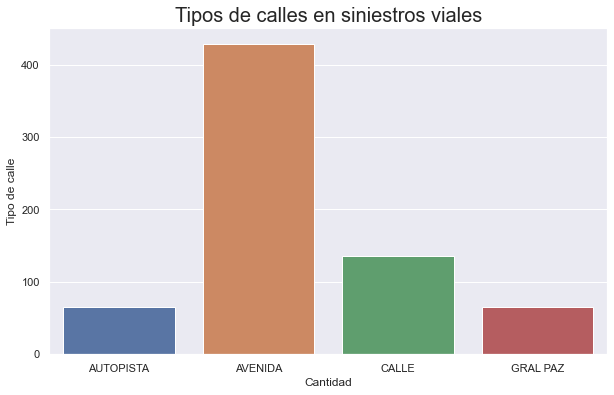

In [71]:
# Grafico para ver la cantidad de victimas en cada tipo de calles
plt.figure(figsize=(10, 6))
sns.countplot(x=df_hechos["TIPO_DE_CALLE"])
plt.xlabel('Cantidad')
plt.ylabel('Tipo de calle')
plt.title('Tipos de calles en siniestros viales', fontsize=20)
plt.show()

In [72]:
df_hechos["COMUNA"] = df_hechos["COMUNA"].astype('category')
df_hechos["COMUNA"].value_counts().head()

1    90
4    76
9    73
8    65
7    60
Name: COMUNA, dtype: int64

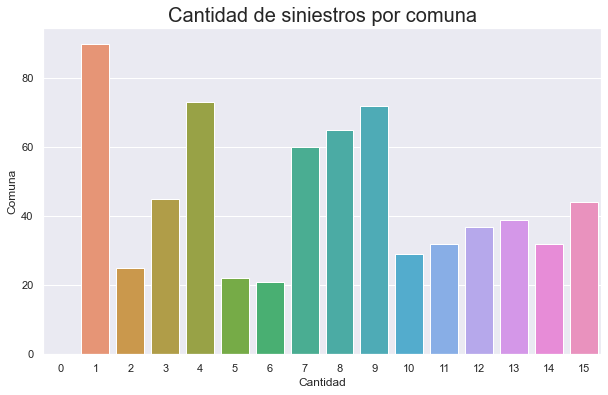

In [108]:
# Grafico para ver la cantidad de victimas en cada comuna
plt.figure(figsize=(10, 6))
sns.countplot(x=df_hechos["COMUNA"])
plt.xlabel('Cantidad')
plt.ylabel('Comuna')
plt.title('Cantidad de siniestros por comuna', fontsize=20)
plt.show()

**Columnas de dirección: 'LUGAR_DEL_HECHO', 'Calle', 'Altura', 'Cruce', 'Dirección Normalizada', 'XY (CABA)', 'pos x', 'pos y'**

Durante el análisis de las columnas 'pos x' y 'pos y', datos de importancia para la ubicación geográfica de los siniestros, se puede ver que si bien no hay datos nulos, hay 12 datos sin coordenadas. Luego de analizar el resto de la información presente en el DataFrame, se pudieron encontrar las coordenadas de dos siniestros más. El resto de estos registros serán eliminados para facilitar el trabajo con los datos.

In [75]:
print("valor X", df_hechos['pos x'].apply(type).value_counts())
print("valor Y", df_hechos['pos y'].apply(type).value_counts())

valor X <class 'str'>    696
Name: pos x, dtype: int64
valor Y <class 'str'>    696
Name: pos y, dtype: int64


In [76]:
# datos nulos
print("Nulos valor X", df_hechos['pos x'].isna().sum())
print("Nulos valor Y", df_hechos['pos x'].isna().sum())

Nulos valor X 0
Nulos valor Y 0


In [77]:
# datos no nulos pero faltantes
print("Incorrectos valor X", df_hechos['pos x'][~df_hechos['pos x'].str.startswith('-')].count())
print("Incorrectos valor Y", df_hechos['pos y'][~df_hechos['pos y'].str.startswith('-')].count())

Incorrectos valor X 12
Incorrectos valor Y 12


In [78]:
# busco informacion para completar esos datos faltantes
df_hechos[['LUGAR_DEL_HECHO', 'Calle', 'Altura', 'Cruce',
       'Dirección Normalizada', 'COMUNA', 'XY (CABA)']][~df_hechos['pos x'].str.startswith('-')]

,LUGAR_DEL_HECHO,Calle,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA)
38,AUTOPISTA LUGONES PK 10000,"LUGONES, LEOPOLDO AV.",NaN,NaN,NaN,13,Point (. .)
106,AU BUENOS AIRES - LA PLATA KM. 4,AUTOPISTA BUENOS AIRES - LA PLATA,NaN,NaN,NaN,4,Point (. .)
119,SD,NaN,NaN,NaN,NaN,0,Point (. .)
139,AUTOPISTA 25 DE MAYO,AUTOPISTA 25 DE MAYO,NaN,NaN,AUTOPISTA 25 DE MAYO,0,Point (. .)
176,AV. LEOPOLDO LUGONES PKM 6900,"LUGONES, LEOPOLDO AV.",NaN,NaN,"LUGONES, LEOPOLDO AV.",14,Point (. .)
180,AU PERITO MORENO Y RAMAL ENLACE AU1/AU6,AUTOPISTA PERITO MORENO,NaN,NaN,NaN,9,Point (. .)
181,AU DELLEPIANE 2400,AUTOPISTA DELLEPIANE LUIS TTE. GRAL.,NaN,NaN,NaN,7,Point (. .)
256,AU ARTURO FRONDIZI PKM 3100,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,NaN,NaN,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,4,Point (. .)
313,AUTOPISTA LUGONES KM 4.7,"LUGONES, LEOPOLDO AV.",NaN,NaN,NaN,14,Point (. .)
546,"LUGONES, LEOPOLDO AV. KM 6,1","LUGONES, LEOPOLDO AV.",NaN,NaN,NaN,14,Point (. .)


In [79]:
# remplazo los valores de coordenadas utilizando la informacion presente
df_hechos.loc[df_hechos['pos x'].index == 181, 'pos x'] = '-58.47562104861002'
df_hechos.loc[df_hechos['pos y'].index == 181, 'pos y'] = '-34.6691035660668'

df_hechos.loc[df_hechos['pos x'].index == 559, 'pos x'] = '-58.493243833268835'
df_hechos.loc[df_hechos['pos y'].index == 559, 'pos y'] = '-34.66318715535642'

In [80]:
df_hechos['pos x'][~df_hechos['pos x'].str.startswith('-')].index

Int64Index([38, 106, 119, 139, 176, 180, 256, 313, 546, 621], dtype='int64')

In [81]:
# elimino esos registros que no tienen informacion 
indices_eliminar = [38, 106, 119, 139, 176, 180, 256, 313, 546, 621]
df_hechos = df_hechos.drop(indices_eliminar)

**Columna Cruce**

- Se reemplazan los valores nulos por un 'NO' para facilitar el trabajo posterior.
- En el gráfico "Proporción de siniestros en cruce de calles" podemos ver que la mayoría (76.5%) de los siniestros con víctimas fatales son en cruces de calles.

In [82]:
df_hechos['Cruce'].apply(type).value_counts()

<class 'str'>      525
<class 'float'>    161
Name: Cruce, dtype: int64

In [83]:
df_hechos['Cruce'].isna().sum()

161

In [84]:
def reemplazar_nulo(valor):
    if pd.isnull(valor):
        return 0
    else:
        return 1

# Aplicar la función a una columna
df_hechos['Cruce'] = df_hechos['Cruce'].apply(reemplazar_nulo)

In [85]:
df_hechos['Cruce'].value_counts()

1    525
0    161
Name: Cruce, dtype: int64

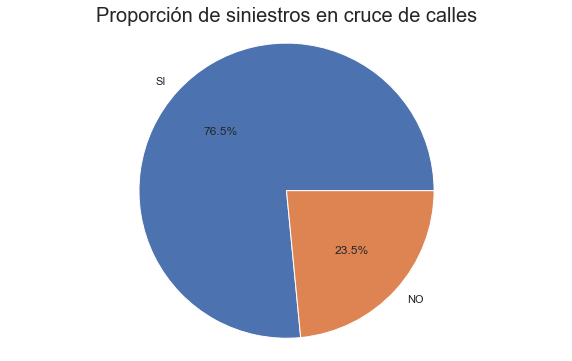

In [86]:
# Hacemos un grafico para ver la proporcion de siniestros que fueron o no en cruce
cantidad_no =df_hechos['Cruce'].value_counts()
cantidad = cantidad_no.values
etiquetas = ['SI', 'NO']

plt.figure(figsize=(10, 6))
plt.pie(cantidad, labels=etiquetas, autopct='%1.1f%%')
plt.axis('equal') 
plt.title("Proporción de siniestros en cruce de calles", fontsize=20)

plt.show()

In [87]:
#df_hechos[['ID_hecho', 'N_VICTIMAS', 'FECHA', 'HH','TIPO_DE_CALLE', 'Cruce', 'COMUNA', 'pos x', 'pos y',
#       'PARTICIPANTES', 'VICTIMA', 'ACUSADO']].to_csv('Power_BI\df_hechos.csv', index=False)

**Graficos de relaciones de variables**

- Me quedo con las columnas más útiles y realizo un .merge() con 'ID_hecho' como clave para poder realizar gráficos para identificar tendencias, patrones y posibles correlaciones entre las variables en el conjunto de datos multidimensional. Esto permite encontrar información valiosa sobre la estructura de los datos y facilitar la identificación de relaciones importantes.
- En el gráfico 'Matriz de correlación', realizado con variables numéricas para tener una representación visual de la relación estadística entre las variables, se puede observar que no existe correlación entre estas variables, ya que ningún valor es de +- 0.75.
- En los gráficos pairplot, útiles para identificar tendencias, patrones y posibles correlaciones entre las variables en un conjunto de datos multidimensional, se puede observar tanto con hue='Tipo de calle' como con hue='Cruce' que no hay correlación marcada entre las variables.

In [92]:
# me quedo con las columnas utiles
df_hechos_redu = df_hechos.copy() 
df_hechos_redu = df_hechos_redu.drop(columns=['FECHA', 'AAAA', 'MM', 'DD','LUGAR_DEL_HECHO', 'Calle', 'Altura',
                                               'PARTICIPANTES', 'VICTIMA', 'Dirección Normalizada', 'XY (CABA)'])

In [93]:
df_siniestros = pd.merge(df_hechos_redu,df_victimas,on='ID_hecho')

In [94]:
df_siniestros.head(1)

,ID_hecho,N_VICTIMAS,HH,TIPO_DE_CALLE,Cruce,COMUNA,pos x,pos y,ACUSADO,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,FECHA_FALLECIMIENTO,EDAD
0,2016-0001,1,4,AVENIDA,1,8,-58.47533969,-34.68757022,AUTO,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,2016-01-01 00:00:00,19


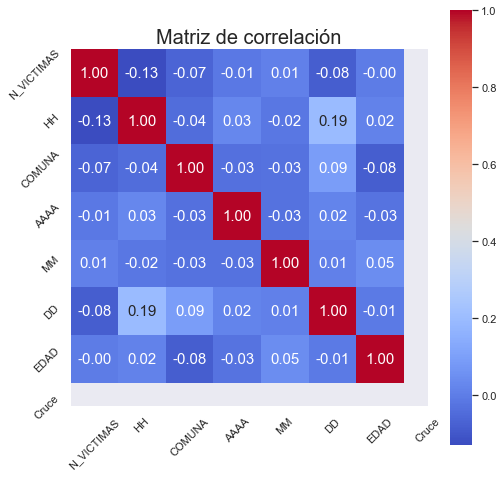

In [96]:
# Matriz de correlacion
# Evaluo nuevamente todos los datos numericos

df_numericos = df_siniestros[['N_VICTIMAS', 'HH','COMUNA','AAAA', 'MM', 'DD', 'EDAD','Cruce']]
corr = df_numericos.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= df_numericos.columns, 
           yticklabels= df_numericos.columns,
           cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.title("Matriz de correlación", fontsize=20)

plt.show()

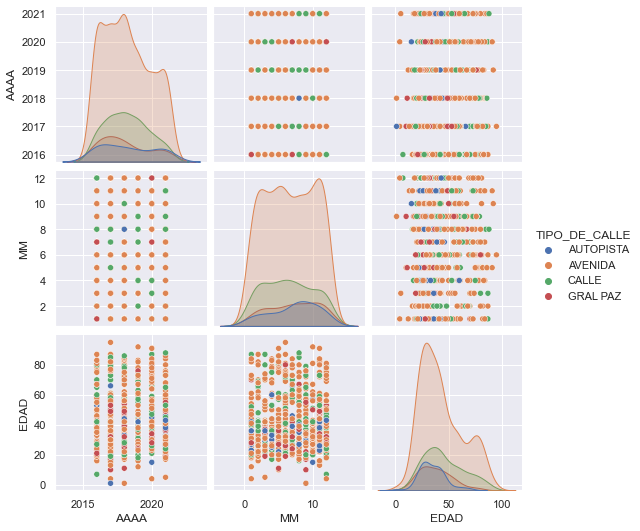

In [98]:
# Pairplot de datos, con hue='TIPO_DE_CALLE'

data = df_siniestros[['TIPO_DE_CALLE', 'COMUNA',
'AAAA', 'MM', 'ROL','VICTIMA', 'SEXO', 'EDAD']]
sns.pairplot(data=data, hue='TIPO_DE_CALLE')

plt.show()

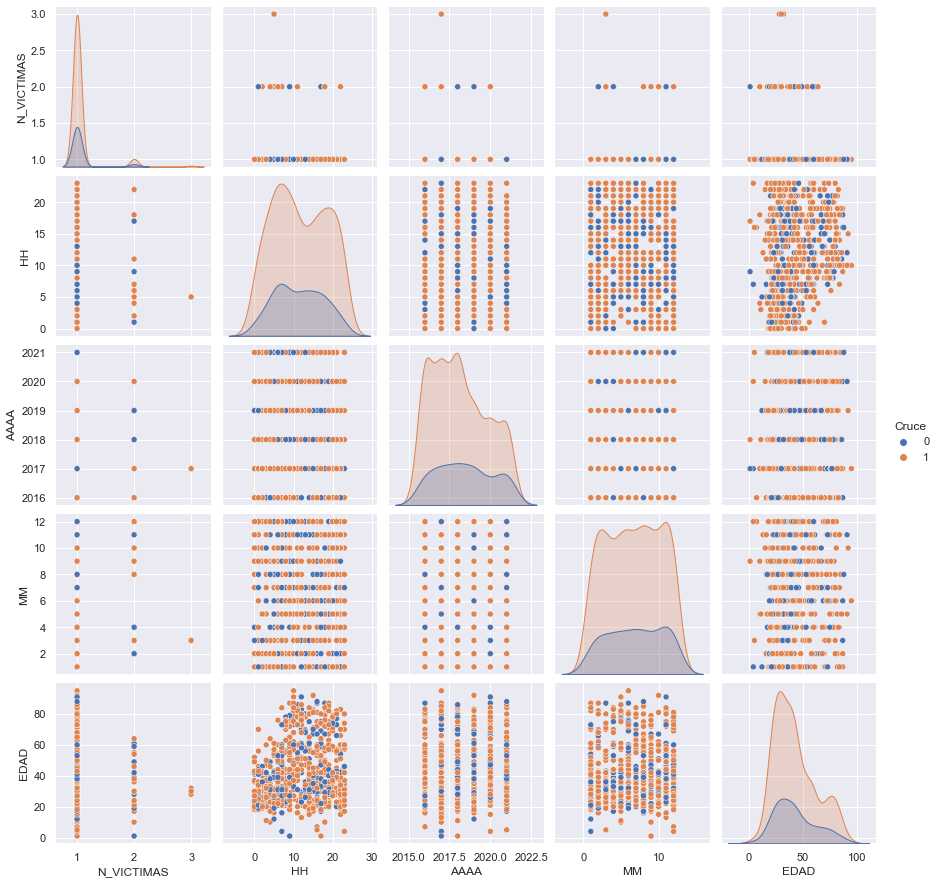

In [99]:
# Pairplot de datos, con hue='Cruce'

data = df_siniestros[['N_VICTIMAS', 'HH', 'TIPO_DE_CALLE', 'Cruce', 'COMUNA',
'ACUSADO', 'AAAA', 'MM', 'ROL','VICTIMA', 'SEXO', 'EDAD']]
sns.pairplot(data=data, hue='Cruce')
plt.show()

En Power BI se continúa con el análisis exploratorio de los datos y se examinan las tendencias y relaciones entre ellos. También se utilizan otras bases de datos para cruzar información.